In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

import lux

from sklearn.preprocessing import MinMaxScaler


In [3]:
df = pd.read_csv('parkinsons.data')
df.head(n=10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [4]:
pd.pandas.set_option('display.max.columns',None)

## Displays every column instead of skipping the columsn in between like ...

In [5]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,0.01026,0.01161,0.01373,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [6]:
df.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [7]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


In [8]:
df['status'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [8]:
# findinng the unique values in data set of each columns


In [9]:
for i in df.columns:
    print('*********************',i,'*************************')
    print()
    print(set(df[i].tolist()))
    print()

********************* name *************************

{'phon_R01_S01_6', 'phon_R01_S32_2', 'phon_R01_S13_3', 'phon_R01_S01_1', 'phon_R01_S27_4', 'phon_R01_S49_1', 'phon_R01_S06_6', 'phon_R01_S10_2', 'phon_R01_S08_1', 'phon_R01_S34_5', 'phon_R01_S35_3', 'phon_R01_S17_5', 'phon_R01_S21_4', 'phon_R01_S26_6', 'phon_R01_S50_4', 'phon_R01_S25_5', 'phon_R01_S32_6', 'phon_R01_S31_2', 'phon_R01_S35_7', 'phon_R01_S21_7', 'phon_R01_S31_3', 'phon_R01_S50_3', 'phon_R01_S20_4', 'phon_R01_S06_1', 'phon_R01_S22_4', 'phon_R01_S32_4', 'phon_R01_S39_2', 'phon_R01_S37_5', 'phon_R01_S08_6', 'phon_R01_S18_4', 'phon_R01_S25_2', 'phon_R01_S19_3', 'phon_R01_S34_4', 'phon_R01_S42_5', 'phon_R01_S20_3', 'phon_R01_S39_5', 'phon_R01_S01_4', 'phon_R01_S32_5', 'phon_R01_S50_2', 'phon_R01_S43_6', 'phon_R01_S44_6', 'phon_R01_S13_5', 'phon_R01_S17_4', 'phon_R01_S16_3', 'phon_R01_S24_1', 'phon_R01_S33_6', 'phon_R01_S17_2', 'phon_R01_S25_6', 'phon_R01_S42_3', 'phon_R01_S19_2', 'phon_R01_S17_6', 'phon_R01_S21_2', 'phon_R01

AxesSubplot(0.125,0.125;0.775x0.755)


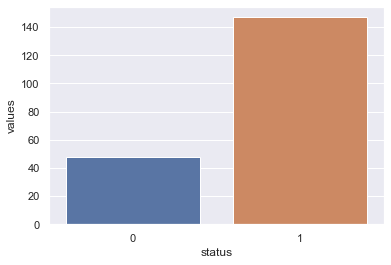

In [9]:
temp = df['status'].value_counts()

temp_df = pd.DataFrame({'status': temp.index, 'values' :temp.values })

print(sns.barplot(x='status', y = 'values', data = temp_df))



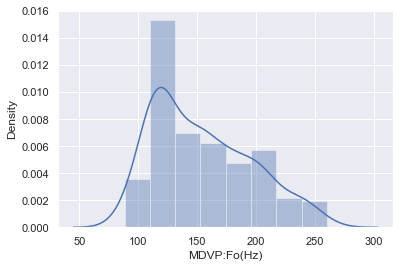

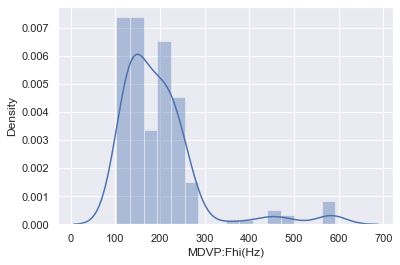

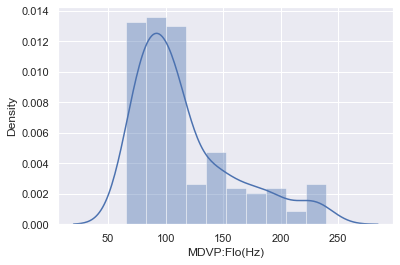

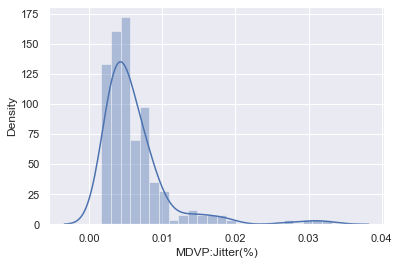

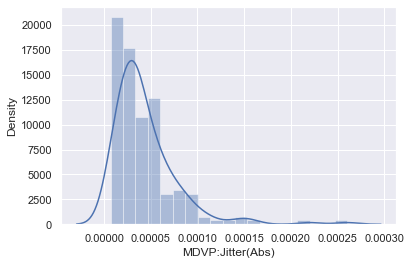

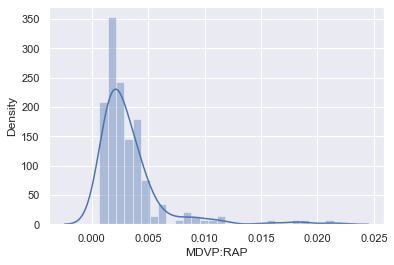

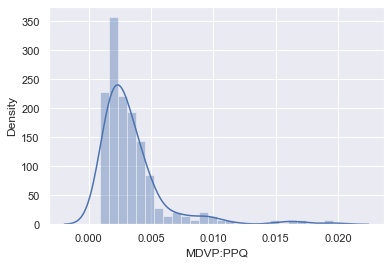

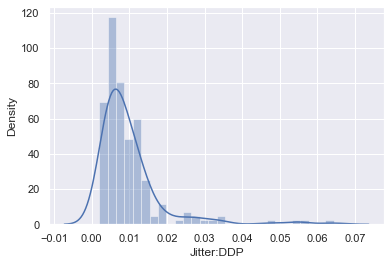

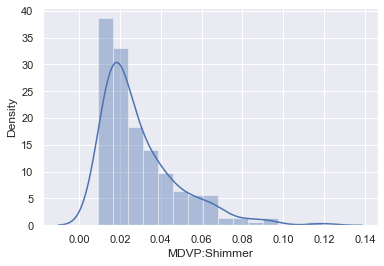

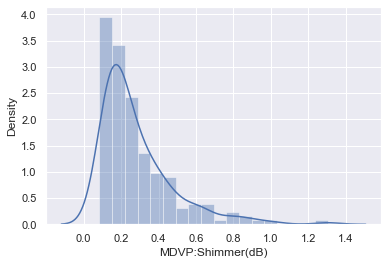

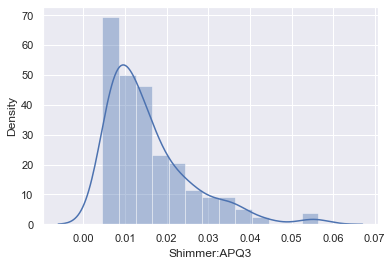

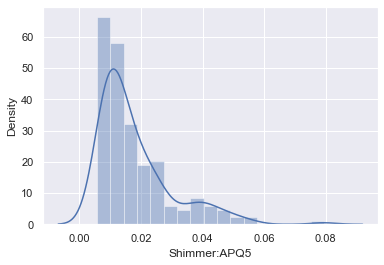

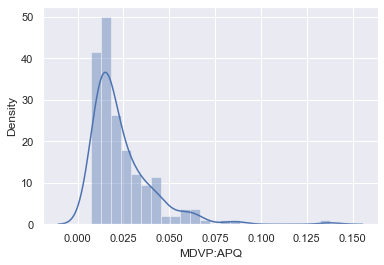

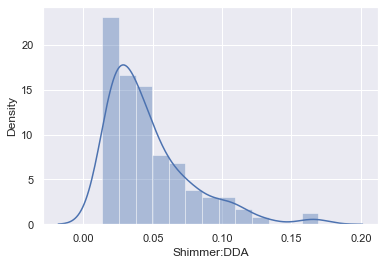

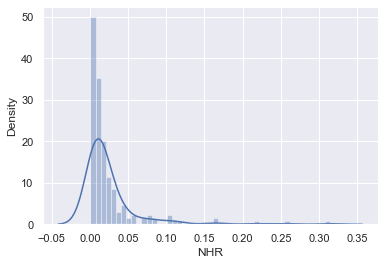

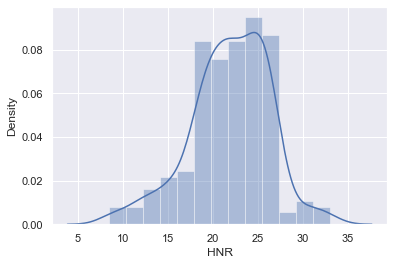

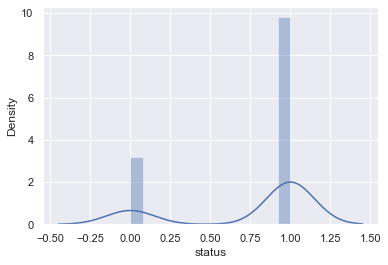

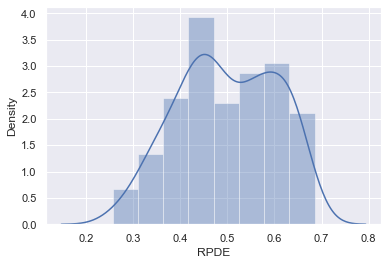

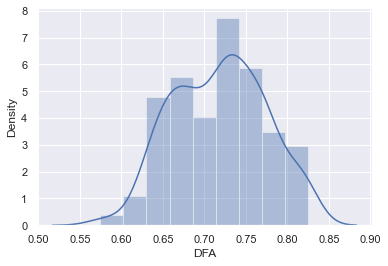

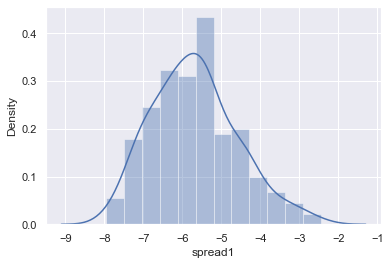

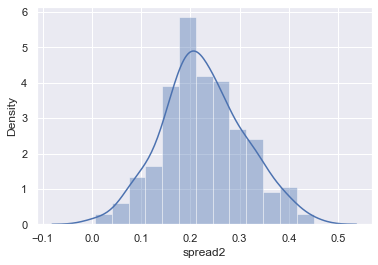

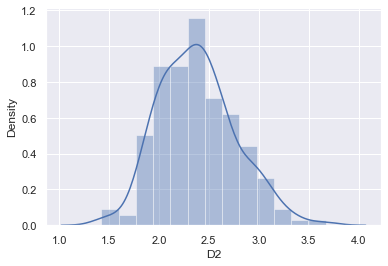

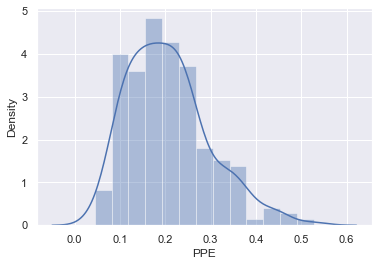

In [10]:
## Find the distribution of the data

def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df.columns)[1:]:
    distplots(i)

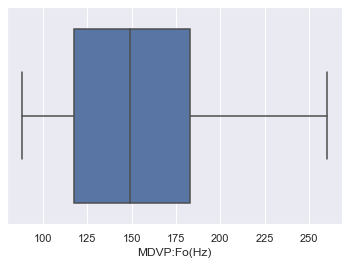

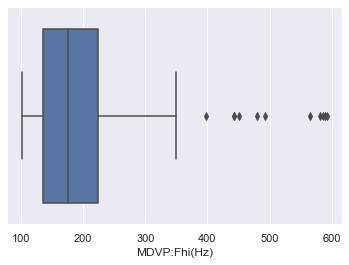

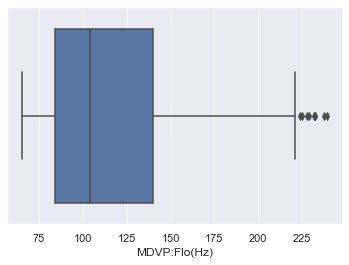

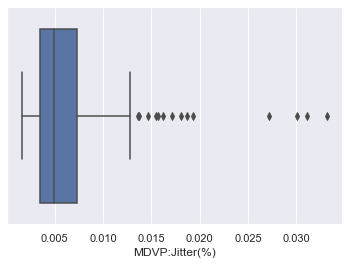

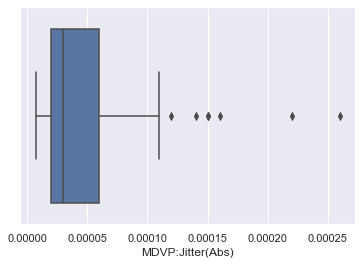

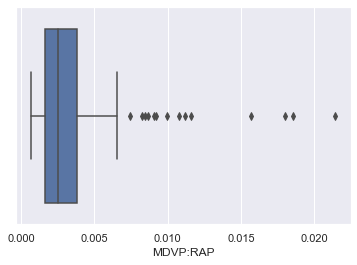

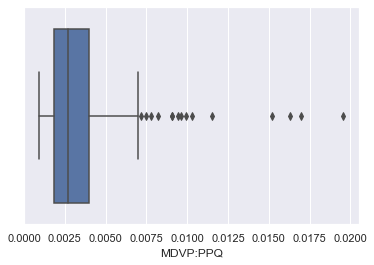

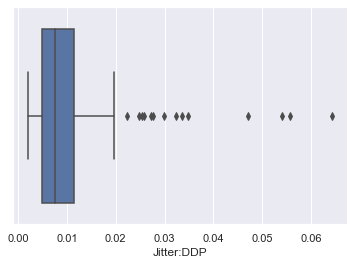

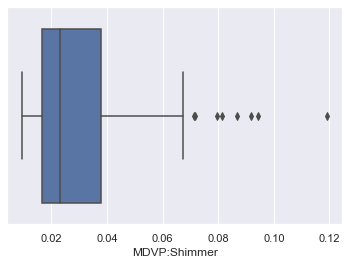

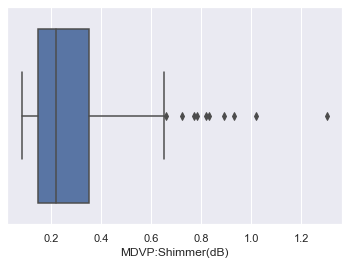

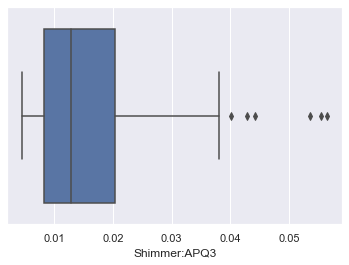

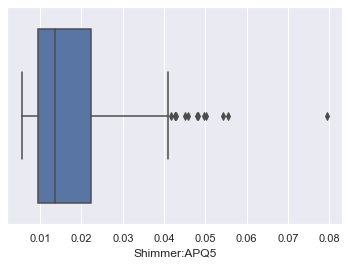

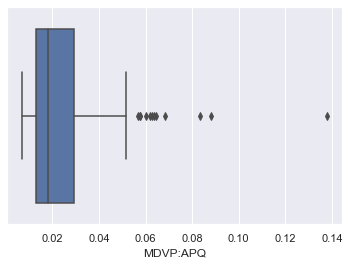

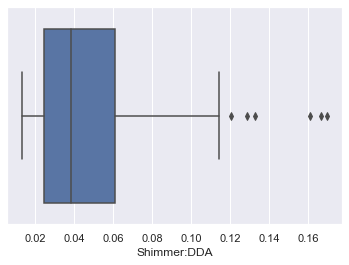

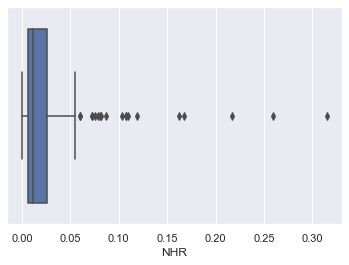

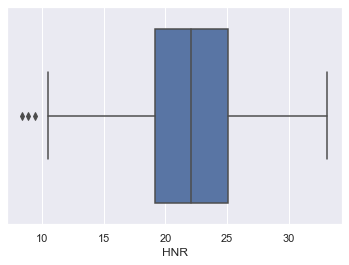

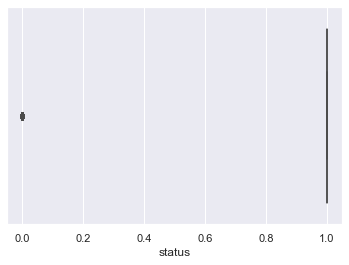

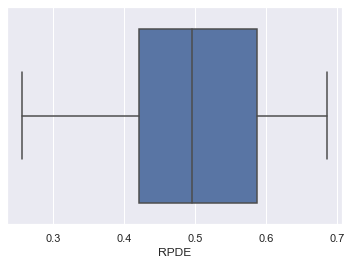

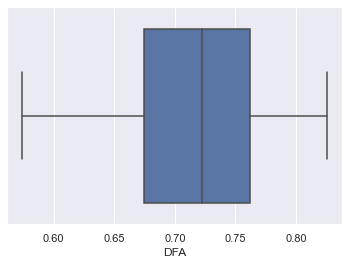

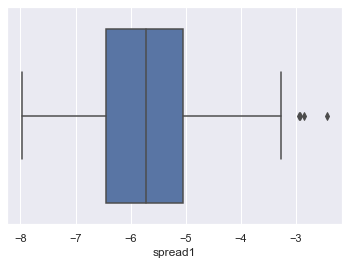

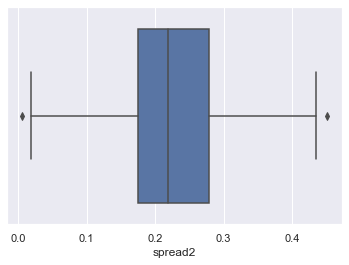

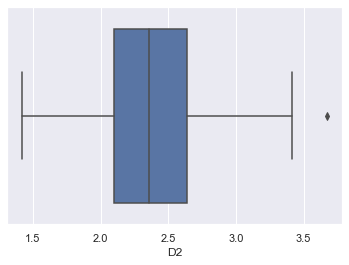

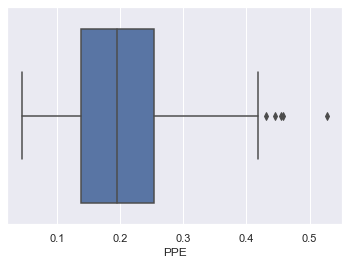

In [11]:
## Find the distribution of the data

def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude= ['object'])):
    boxplots(i)

In [13]:
# Advanced EDA - dtale

# !pip install dtale

In [14]:
#!pip install dtale

In [15]:
import dtale
import dtale.app as dtale_app

In [16]:
dtale.show(df)

In [17]:
## Panda profiling 
# !pip install pandas-profiling

#!pip install pandas_profiling

In [18]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)

prof.to_file(output_file= 'output.html')

2023-08-22 19:54:03,470 - INFO     - Pandas backend loaded 1.4.2
2023-08-22 19:54:03,499 - INFO     - Numpy backend loaded 1.21.5
2023-08-22 19:54:03,502 - INFO     - Pyspark backend NOT loaded
2023-08-22 19:54:03,503 - INFO     - Python backend loaded


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [12]:
df.duplicated().sum()

0

In [19]:
### Split the data in independent and dependent variable

In [13]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [14]:
x = df.drop(['name','status'],axis=1)
y = df[['status']]

In [15]:
x.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [16]:
y.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [26]:
### Imbalance treatment required as more data of one's is present than zero,, 
###always better to have more data set hence Oversampling method/ Smote technique bith same

In [17]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [22]:
ros = RandomOverSampler()
x_ros , y_ros = ros.fit_resample(x,y)

pd.DataFrame(y_ros).value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [29]:
### Feature Scaling
#Scaling values from -1 to 1 for the Data

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [23]:
sc = MinMaxScaler((-1,1))

x = sc.fit_transform(x_ros)
y = y_ros  ### Y is not scaled bcos it is dependent variable and it ranges from 0 to 1

In [24]:
pd.DataFrame(x).shape

(294, 22)

In [25]:
x.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [26]:
y.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [27]:

## Principal component analysis- dimension reduction


#To analyse the main component and only keep those main components which matters more for the Pakisons diesease 
#it may be calculated on basis of colinearity or affecting for the status

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(0.95)

In [30]:
x_pca = pca.fit_transform(x)

In [31]:
print(x.shape)
print(x_pca.shape)

(294, 22)
(294, 8)


In [32]:
pd.DataFrame(x_pca)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [42]:
### Splitting the Data into Training Data set

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.2, random_state = 101)

In [45]:
## Using Random forest Classifier model


In [46]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf = RandomForestClassifier(criterion = 'gini', random_state = 1)

In [49]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [55]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

In [56]:
# Evaluating

In [57]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [58]:
print( confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))

[[114   0]
 [  0 121]]

[[30  3]
 [ 2 24]]


In [59]:
print( classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       121

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235


              precision    recall  f1-score   support

           0       0.94      0.91      0.92        33
           1       0.89      0.92      0.91        26

    accuracy                           0.92        59
   macro avg       0.91      0.92      0.91        59
weighted avg       0.92      0.92      0.92        59



In [60]:
print( accuracy_score(y_train, y_pred_train))
print()
print(accuracy_score(y_test, y_pred_test))

1.0

0.9152542372881356


In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
train_acc = cross_val_score(rf,x_train,y_train,cv=10)

tes_acc = cross_val_score(rf, x_test, y_test, cv=10)

## Cv = 10 means getting 10 accuracies

In [64]:
print(train_acc.mean())
print(tes_acc.mean())

0.9492753623188406
0.8666666666666668


In [ ]:
## Trying diff model

In [66]:
### XGBoost 
#Xtreme Gradiecnt Boosting

In [67]:
##!pip install xgboost

In [68]:
from xgboost import XGBClassifier

In [69]:
xgb = XGBClassifier(random_state = 1)

In [70]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [71]:
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

In [72]:
print( classification_report(y_train, y_pred_train_xgb))
print()
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       121

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235


              precision    recall  f1-score   support

           0       0.91      0.91      0.91        33
           1       0.88      0.88      0.88        26

    accuracy                           0.90        59
   macro avg       0.90      0.90      0.90        59
weighted avg       0.90      0.90      0.90        59



In [73]:
print( accuracy_score(y_train, y_pred_train_xgb))
print()
print(accuracy_score(y_test, y_pred_test_xgb))

1.0

0.8983050847457628


In [75]:
train_acc_xgb = cross_val_score(xgb,x_train,y_train,cv=10)

tes_acc_xgb = cross_val_score(xgb, x_test, y_test, cv=10)

## Cv = 10 means getting 10 accuracies

In [76]:
print(train_acc_xgb.mean())
print(tes_acc_xgb.mean())

0.9489130434782609
0.8466666666666667


2023-08-22 20:54:03,323 - INFO     - Executing shutdown due to inactivity...
2023-08-22 20:54:07,703 - INFO     - Executing shutdown...


In [ ]:
## Bagging - rf model - handling overfitting (High variance problem)
##Overfitting - when model fits exactly to the training data set
##for examvple if it scores more in training accuracy and test accuracy

### boosting - xgf - handling high bias (under fitting problem)


###Underfitting - when the model has not learned all the patterns correct;y hence predicts wrong on new data set
##